In [1]:
import random
import time
import numpy as np
import matplotlib.pyplot as plt

# ギブスサンプリング法を用いて相関のある多変数ガウス分布の計算を行う

確率分布は, 重みを
\begin{align}
S(x, y, z) = \frac{x^2 + 2y^2 + 2z^2 + 2xy + 2yz + 2zx}{2}
\end{align}
として
\begin{align}
P(x, y, z) = \frac{e^{-S(x, y, z)}}{Z}
\end{align}
とする.

In [4]:
def boxMuller(mu, sigma): # generate a variable following Gaussian distribution
    seed = time.time_ns()
    random.seed(seed)
    p = random.random()
    seed = time.time_ns()
    random.seed(seed)
    q = random.random()
    x = (np.sqrt(-2 * np.log(p))) * np.cos(2 * np.pi * q)
    return sigma * x + mu

In [52]:
n_iter = 10000 # number of iteration
ndim = 3
exp_val = 0 # set variable we want to compute the expectation value
var = 0
points_list = [] # sampling points

x = np.zeros((ndim, 1)) # initial value
A = np.zeros((ndim, ndim))
A[0][0] = 1
A[1][1] = A[2][2] = 2
A[0][1] = A[1][0] = 1
A[0][2] = A[2][0] = 1
A[1][2] = A[2][1] = 1

for i in range(n_iter):
    # update x
    sigma = 1 / np.sqrt(A[0][0])
    mu = - (A[0][1] / A[0][0]) * x[1] - (A[0][2] / A[0][0]) * x[2]
    x[0] = boxMuller(mu, sigma)
    # update y
    sigma = 1 / np.sqrt(A[1][1])
    mu = - (A[1][0] / A[1][1]) * x[0] - (A[1][2] / A[1][1]) * x[2]
    x[1] = boxMuller(mu, sigma)
    # update z
    sigma = 1 / np.sqrt(A[2][2])
    mu = - (A[2][0] / A[2][2]) * x[0] - (A[2][1] / A[2][2]) * x[1]
    x[2] = boxMuller(mu, sigma)
    # compute expectation values
    exp_val += x
    var += x**2
    if i % 5 == 0:
        points_list.append(x.copy())

# print results
print('expectation value of x:', exp_val/n_iter)
print('variance of x:', var/n_iter)

expectation value of x: [[ 0.0297113 ]
 [-0.0148078 ]
 [-0.00907428]]
variance of x: [[3.02571231]
 [1.01015151]
 [0.99704762]]


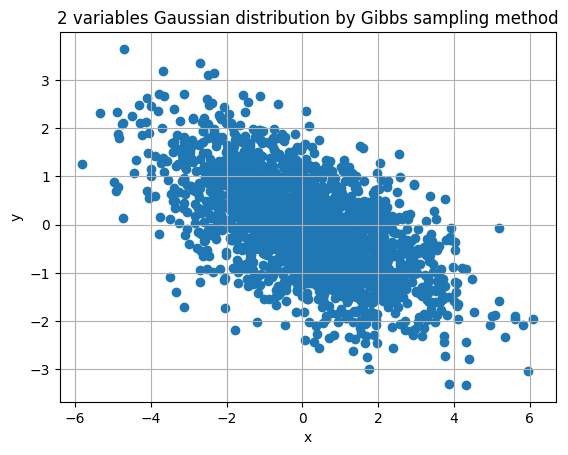

In [53]:
# リストからxとyの値を分けて取得
x_values = [x for x, _, _ in points_list]
y_values = [y for _, y, _ in points_list]

# プロット
plt.scatter(x_values, y_values)

# グラフのタイトルとラベル
plt.title("2 variables Gaussian distribution by Gibbs sampling method")
plt.xlabel("x")
plt.ylabel("y")

# グリッドを表示
plt.grid(True)

# グラフを表示
plt.show()